# Clasificación de flores con regresión lineal

In [3]:
#Importamos nuestras librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [11]:
#Importamos nuestra información
data = datasets.load_iris()
#print(data.DESCR)
print(data.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
#Seleccionamos data
X = data.data[:, 2:4]
Y = data.target

#1e5 parametro para definir umbral de activación
#solver parametro, para que pueda trabajar más rápido con los datos
#'multinomial' nos permite trabajar con más de dos clasificaciones (no binarias)
logit = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')


In [9]:
#Creamos instancia de Logistic Regression Classifier
logit.fit(X, Y)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02 

#meshgrid genera matriz e intenta buscar 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logit.predict(np.c_[xx.ravel(), yy.ravel()])

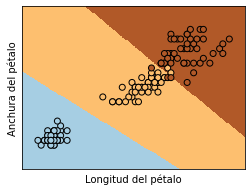

In [10]:
#Plot

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Longitud del pétalo')
plt.ylabel('Anchura del pétalo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()